In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
TR = 50
T1 = 1000
T2_star = 50
res = 100
t = np.arange(0, 1500 ,0.1)

In [3]:
def Mz_Mxy(t, alpha, TR, T1, T2_star):
    Mz = np.empty(t.shape)
    Mxy = np.empty(t.shape)
    temp = 0
    M0 = 1
    for idx, tt in enumerate(t):
        if tt == 0:
            Mz[idx] = temp = np.cos(alpha * np.pi / 180)
            M0 = Mxy[idx] = np.sin(alpha * np.pi / 180)
        elif tt % TR == 0:
            Mz[idx] = temp =  Mz[idx-1] * np.cos(alpha * np.pi / 180)
            M0 = Mxy[idx] = Mz[idx-1] * np.sin(alpha * np.pi / 180)
        else:
            Mz[idx] = (1 - temp) * (1 - np.exp(-(tt % TR)/T1)) + temp
            Mxy[idx] = M0 * np.exp(-(tt % TR)/T2_star)
            
    return Mz, Mxy

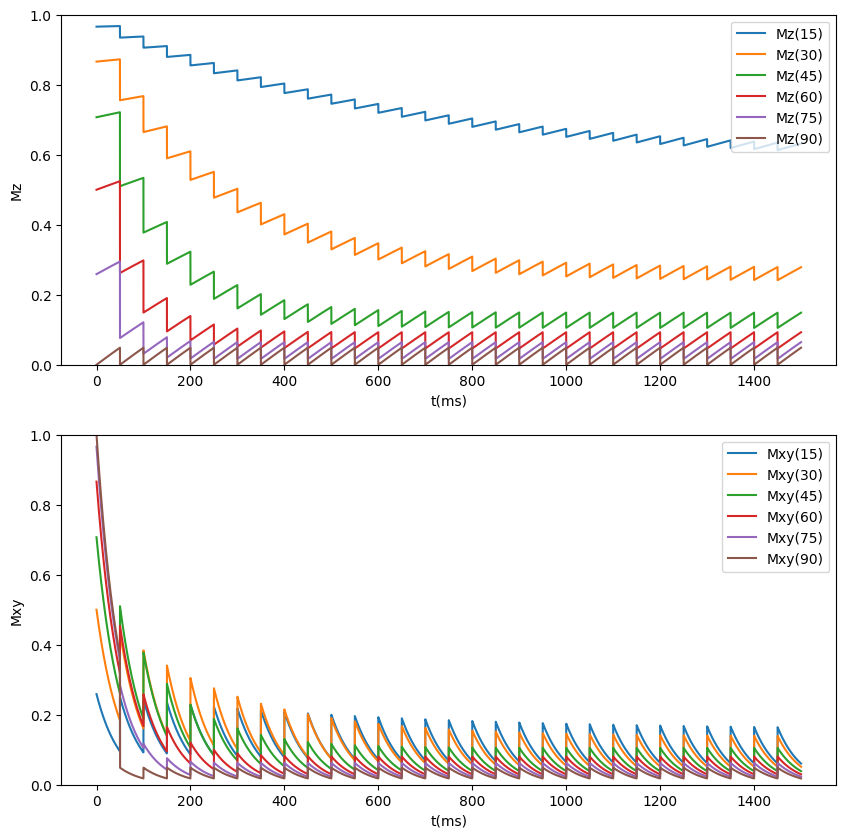

In [12]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
# Mz, Mxy = Mz_Mxy(t, 60, TR, T2_star)
# ax[0].plot(t, Mxy, label=f"Mz({i})")
# ax[1].plot(t, Mz, label=f"Mz({i})")
for i in range(15, 91, 15):
    Mz, Mxy = Mz_Mxy(t, i, TR, T1, T2_star)
    ax[0].plot(t, Mz, label=f"Mz({i})")
    ax[1].plot(t, Mxy, label=f"Mxy({i})")
ax[0].legend(loc='upper right')
ax[1].legend(loc='upper right')
ax[0].set_ylim(0, 1)
ax[1].set_ylim(0, 1)
ax[0].set_xlabel('t(ms)')
ax[1].set_xlabel('t(ms)')
ax[0].set_ylabel('Mz')
ax[1].set_ylabel('Mxy')
plt.savefig('problem1.svg')
plt.savefig('problem1.png')
plt.show()